# <b>1 <span style='color:#ff9a03b3'>|</span> Introduction<span> 🌒</span> </b>
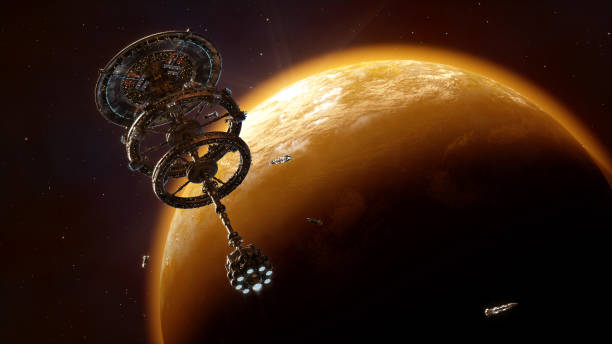

### Features definition
1. PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

2. HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

3. CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

4. Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

5. Destination - The planet the passenger will be debarking to.

6. Age - The age of the passenger.

7. VIP - Whether the passenger has paid for special VIP service during the voyage.

8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

9. Name - The first and last names of the passenger.

10. Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# <b>2 <span style='color:#ff9a03b3'>|</span> Import Libraries</b>

In [ ]:
import pandas as pd # Importing pandas for performing data manipulation and analysis
import numpy as np # Importing numpy for performing a wide variety of mathematical operations on arrays
import matplotlib.pyplot as plt # Importng matplotlib for data visualization
import seaborn as sns # Seaborn is derived from matplotlib and provides a variety of different graphs

%matplotlib inline

import missingno as msno ## This library is used to visualize missing records for each feature

from sklearn.impute import SimpleImputer # For missing data
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


# <b>3 <span style='color:#ff9a03b3'>|</span> Reading Data</b>

In [ ]:
PATH_TRAIN      = '../input/spaceship-titanic/train.csv'
PATH_TEST       = '../input/spaceship-titanic/test.csv'
PATH_SUBMISSION = '../input/spaceship-titanic/sample_submission.csv'

In [ ]:
train_dataset = pd.read_csv(PATH_TRAIN)
test_dataset = pd.read_csv(PATH_TEST)
submission_dataset = pd.read_csv(PATH_SUBMISSION)

In [ ]:
print('Shape of train data set:{} '.format(train_dataset.shape))
print('Shape of test data set:{} '.format(test_dataset.shape))

In [ ]:
# train_dataset.tail() is used to display the last five records of the dataset
# train_dataset.sample(number) is used to randomly display 'num' records of the dataset (you specify the number)

train_dataset.head()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#ff9a03b3;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>3.1 | Summary of numerical features </b></p>
</div>. 

In [ ]:
train_dataset.describe().T.style.set_properties(**{'background-color': '#cf771cd6','color': 'white','border-color': 'white'})

##### If you can notice we have outliers in our data it will cause problems as you see the average Room Service expenses is about 224 but the maximum value is about 14000, and the same thing for the rest of the features, as you can see too the age, the minimum is zero and this is wrong, soI will assume that there are children who are less than a year old, perhaps months old.

In [ ]:
print(train_dataset.info())

##### There are 7 features from the type of object/string, 6 float and 1 bool, there are missing values for some features too.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#ff9a03b3;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>3.2 | Visualizing missing Data </b></p>
</div>. 

In [ ]:
plt.figure(figsize = (11,6))
sns.heatmap(train_dataset.isna(), cbar = False, cmap='viridis', yticklabels = False)
# msno.bar(train_dataset) # Another way of visualizing missing data
plt.show()

# <b>4 <span style='color:#ff9a03b3'>|</span> Clean Data</b>

In [ ]:
#train_dataset.isnull().sum() another way of wrting the code (It will do the same job)
train_dataset.isna().sum()

In [ ]:
test_dataset.isnull().sum()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#ff9a03b3;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>4.1 | Replacing missing values </b></p>
</div>. 

In [ ]:
#For numerical features you could use (mean, mode, median)
#For features from the type of object we use always the mode or drop them of necessary

#I'm getting all the features from the type of object
#It's necessary to adapt this way sometimes you will have thousands of features it would be impossible to get them manually!
object_features = list(train_dataset.select_dtypes(['object']).columns) 
object_features.remove('Name') #Here the name can't be replaced with the mode because each individual has a different name
float_features = list(train_dataset.select_dtypes(['float64']).columns) #getting all the features from the type of object

for i in object_features:
    test_dataset[i] = test_dataset[i].fillna(test_dataset[i].mode()[0])
    train_dataset[i] = train_dataset[i].fillna(train_dataset[i].mode()[0])
for j in float_features:
    test_dataset[j] = test_dataset[j].fillna(test_dataset[j].mean())
    train_dataset[j] = train_dataset[j].fillna(train_dataset[j].mean())

train_dataset.drop(columns=['Name'], inplace=True, axis = 1)
test_dataset.drop(columns=['Name'], inplace=True, axis = 1)

In [ ]:
# Checking for any duplicates in the id column..
print('Number of duplicates in the id column ({}) for the train dataset'.format(train_dataset['PassengerId'].duplicated().sum()))
print('Number of duplicates in the id column ({}) for the test dataset'.format(test_dataset['PassengerId'].duplicated().sum()))

# <b>5 <span style='color:#ff9a03b3'>|</span> Exploratory Analysis</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#ff9a03b3;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.1 | Heatmap </b></p>
</div>. 

In [ ]:
correlation = train_dataset.corr()
plt.figure(figsize = (13,6))
sns.heatmap(correlation, cmap="rocket_r", annot=True)
plt.show()

In [ ]:
sns.set_style('white')
sns.set_palette('rocket_r')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['Transported']).sort_values()[:-1].plot.barh()
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#ff9a03b3;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.2 | Structure of numerical features
 </b></p>
</div>. 

In [ ]:
# For each numerical feature compute number of unique entries
unique_values = train_dataset.select_dtypes(
  include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4),
                       title="Unique values per feature");

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(train_dataset['RoomService'])
sns.kdeplot(train_dataset['FoodCourt'])
sns.kdeplot(train_dataset['Spa'])
sns.kdeplot(train_dataset['ShoppingMall'])
sns.kdeplot(train_dataset['VRDeck'])
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#ff9a03b3;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.3 |Visualization of Categorical Features
 </b></p>
</div>. 

In [ ]:
plt.figure(figsize=(11,5))
sns.boxplot(x='HomePlanet',y='Age',data=train_dataset)
plt.title("Range Of Passengers' Age ",fontsize = 16)
plt.show()

##### We can see that most of the passengers' age lies between 20-40, and of course there are outliars we can take care of them later in the preprocessing step.

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x = 'Destination', data = train_dataset, hue='Transported')
plt.show()

#### Seems like most of the passengers were heading to TRAPPIST-1e, and most of the people whe were going to 55 Cancri e got transported.

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x = 'CryoSleep', data = train_dataset, hue='Transported')
plt.show()

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x = 'HomePlanet', data = train_dataset, hue='Transported')
plt.show()

##### You can see that most of the people who got transported were from Earth, but this does not prove anything because most of the passengers are from Earth, but you can see that the passengers of Europa and Mars almost the same percentage, except that the percentage that was transported from Europa is more than in Mars. 

# <b>6 <span style='color:#ff9a03b3'>|</span> Data Preprocessing</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#ff9a03b3;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>6.1 | Encoding </b></p>
</div>. 

In [ ]:
train_dataset.drop(columns=['PassengerId'], inplace= True, axis = 1)
test_dataset.drop(columns=['PassengerId'], inplace= True, axis = 1)

In [ ]:
label_cols_train = ['VIP', 'CryoSleep', 'Transported']
label_cols_test = ['VIP', 'CryoSleep']


for col_train in label_cols_train:
    train_dataset[col_train] = train_dataset[col_train].astype(str)
for col_test in label_cols_test:
    test_dataset[col_test] = test_dataset[col_test].astype(str)

In [ ]:
def encoding(train_dataset, test_dataset):
    object_features_train = list(train_dataset.select_dtypes(object).columns)
    object_features_test = list(test_dataset.select_dtypes(object).columns)

    encoder = LabelEncoder()
    
    for i in object_features_train:    
        train_dataset[i] = encoder.fit_transform(train_dataset[i])
    for j in object_features_test:    
        test_dataset[j]  = encoder.fit_transform(test_dataset[j])
    
    return pd.DataFrame(train_dataset), pd.DataFrame(test_dataset)


encoded_dataframes = encoding(train_dataset, test_dataset)

train_dataset.head()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#ff9a03b3;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>6.2 | Standardization </b></p>
</div>. 

In [ ]:
cols = ['HomePlanet','Cabin','Destination','Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
Scaler = StandardScaler()
train_dataset[cols] = Scaler.fit_transform(train_dataset[cols])
test_dataset[cols] = Scaler.fit_transform(test_dataset[cols])

# <b>7 <span style='color:#ff9a03b3'>|</span> Split Dataset for Training and Testing</b>

In [ ]:
#Select Features
features = train_dataset.drop(columns =['Transported'], axis = 1)

#Select Target 
target = train_dataset['Transported']

# Set Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

# <b>8 <span style='color:#ff9a03b3'>|</span> Modelling</b>

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

<div style="color:white;display:fill;border-radius:8px;
            background-color:#ff9a03b3;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>8.1 | K-nearest Neighbors </b></p>
</div>. 

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 17)

model = knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(model, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

#### Optimizing model accuracy

In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [ ]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.title('The accuracy of KNN', fontsize = 16)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

#### so the best value for KNN is 17 !

<div style="color:white;display:fill;border-radius:8px;
            background-color:#ff9a03b3;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>8.2 | RandomForest </b></p>
</div>. 

In [ ]:
Rfc = RandomForestClassifier(max_depth=2, random_state=0)

Rfc.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(Rfc, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

In [ ]:
y_pred = model.predict(test_dataset) == True

In [ ]:
submission_dataset['Transported'] = y_pred
submission_dataset.to_csv('submission.csv', index=False)

## <center>Thank You </center>